# 02 · Multiple Inputs

Exercise 2


In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name : str
    values : list[int]
    operation : chr
    message : str

def process_values(state: AgentState) -> AgentState:
    operation = state["operation"]
    if operation == "+":
        state["message"] = "Hi " + state["name"] + ", your answer is: " + str(sum(state["values"]))
    elif operation == "*":
        import math
        state["message"] = "Hi " + state["name"] + ", your answer is: " + str(math.prod(state["values"]))
    return state

In [3]:
graph = StateGraph(AgentState)

graph.add_node("process", process_values)

graph.set_entry_point("process")
graph.set_finish_point("process")

app = graph.compile()

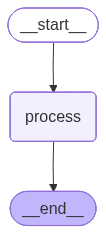

In [4]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
result = app.invoke({"name": "Bob", "values": [1, 2, 3, 4], "operation": "+"})
result["message"]

'Hi Bob, your answer is: 10'

In [6]:
result = app.invoke({"name": "Aaron", "values": [1, 2, 3, 4], "operation": "*"})
result["message"]

'Hi Aaron, your answer is: 24'